# Use tesseract

In [1]:
%load_ext autoreload
%autoreload 2

## Load packages

In [37]:
from dyslexia import preprocessing
from dyslexia.ocr import extract_text_from_image
from dyslexia.io import load_image
from dyslexia.plots import plot_image

import os
from os.path import join, isdir, isfile
from os import listdir
import time
import gc
import jiwer
import pandas as pd
import pickle

from IPython.display import display

In [3]:
%env TESSDATA_PREFIX /usr/share/tesseract-ocr/4.00/tessdata/

env: TESSDATA_PREFIX=/usr/share/tesseract-ocr/4.00/tessdata/


## Load path

In [5]:
# Get all directories with examples
example_path = '../Exemples/'
subdir_paths = [
    join(example_path, p) 
    for p in listdir(example_path) 
    if isdir(join(example_path, p))
]

# Retrieves all files in example dir
all_files = []
for p in [example_path] + subdir_paths:
    _files = [join(p, f) for f in listdir(p) if isfile(join(p, f))]
    
    all_files = all_files + _files
    

# Keeps only jpg extension files
all_files = [f for f in all_files if f[-3:] in ['jpg']]

all_files[:5]

['../Exemples/Ex_Maths/IMG_20210329_123828.jpg',
 '../Exemples/Ex_Maths/IMG_20210329_122221.jpg',
 '../Exemples/Ex_Maths/IMG_20210329_123818.jpg',
 '../Exemples/Ex_Maths/IMG_20210329_122227.jpg',
 '../Exemples/Ex_Maths/IMG_20210329_122202.jpg']

In [6]:
subdir_paths

['../Exemples/Ex_Maths',
 '../Exemples/truth',
 '../Exemples/Histoire_Geo',
 '../Exemples/Dictee',
 '../Exemples/SVT',
 '../Exemples/Ex_COD',
 '../Exemples/Present_indicatif']

## Exec on "Dictée"

In [25]:
images = []
files = [f for f in all_files if 'Dictee' in f]

for file in files:
    img = load_image(file)
    images.append(img)

In [26]:
gc.collect()

32473

Fix rotation angle manually

In [27]:
# Rotation for dictee files
images[0] = preprocessing.rotate_img(images[0], angle=90)
images[1] = preprocessing.rotate_img(images[1], angle=-90)
images[2] = preprocessing.rotate_img(images[2], angle=-90)
images[3] = preprocessing.rotate_img(images[3], angle=-90)

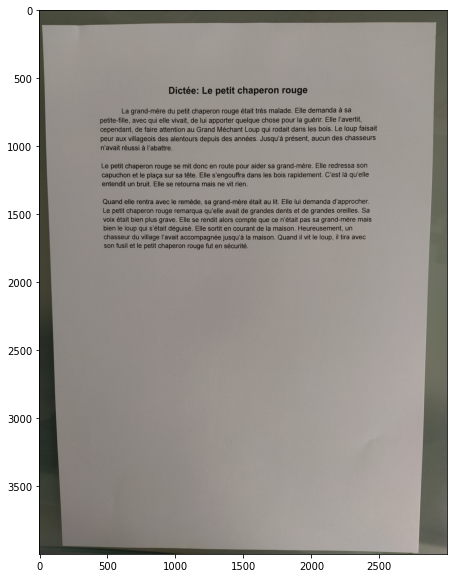

 

Dictée: Le petit chaperon rouge

La grand-mère du petit chaperon rouge était très malade. Elle demanda à sa
petite-fille, avec qui elle vivait, de lui apporter quelque chose pour la guérir. Elle l'avertit,
cependant, de faire attention au Grand Méchant Loup qui rodait dans les bois. Le loup faisait
peur aux villageois des alentours depuis des années. Jusqu’à présent, aucun des chasseurs
n'avait réussi à l’abattre.

Le petit chaperon rouge se mit donc en route pour aider sa grand-mère. Elle redressa son
capuchon et le plaça sur sa tête. Elle s’engouffra dans les bois rapidement. C’est là qu’elle
entendit un bruit. Elle se retourna mais ne vit rien.

Quand elle rentra avec le remède, sa grand-mère était au lit. Elle lui demanda d’approcher.
Le petit chaperon rouge remarqua qu’elle avait de grandes dents et de grandes oreilles. Sa
voix était bien plus grave. Elle se rendit alors compte que ce n’était pas sa grand-mère mais
bien le loup qui s'était déguisé. Elle sortit en courant de la 

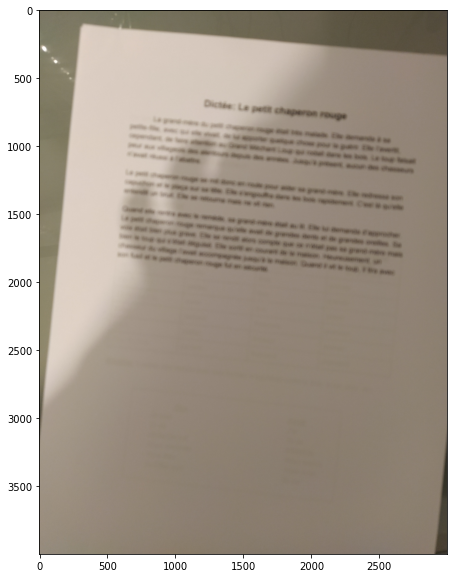

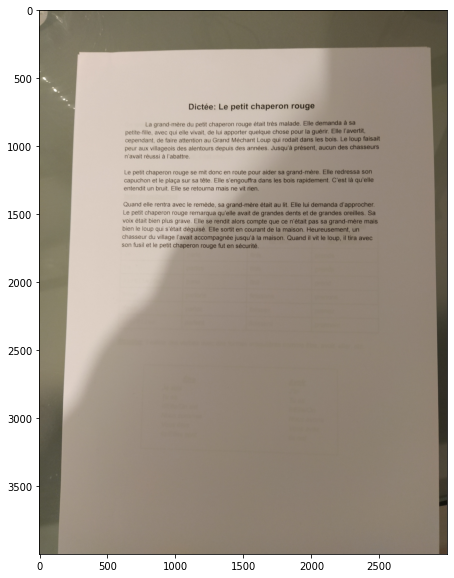

 

7
À

Dictée: Le petit chaperon ro

La grand-mère du petit chaperon rouge était très malad
petite-fille, avec qui elle vivait, de lui apporter quelque chose p
cependant, de faire attention au Grand Méchant Loup qui
peur aux villageois des alentours depuis des années. J

n'avait réussi à l'abattre.

Le petit chaperon rouge se mit donc en route
capuchon et le plaça sur sa tête. Elle s'engouf
entendit un bruit. Elle se retourna mais ne vi

Quand elle rentra avec le remède, sa gr
Le petit chaperon rouge remarqua qu’e
voix était bien plus grave. Elle se

bien le loup qui s’était déguis:

chasseur du village l'avait :

son fusil et le petit cha

 



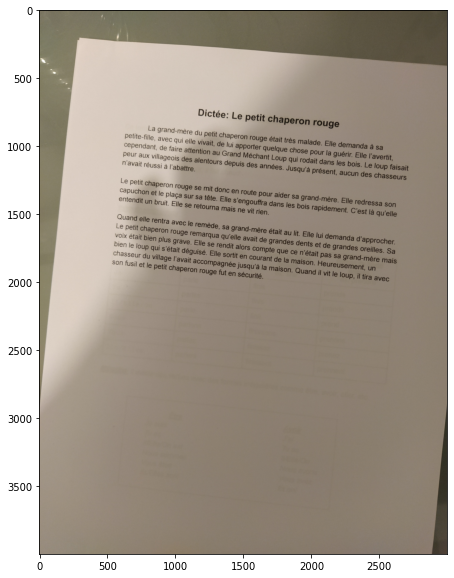

La grand-mère du p
petite-fille, avec qui elle.:
cependant, de fa:re

peur aux v:llageo:s

n'avait réussi à |’ abi

Le petrtä

n éron r

Voix étaj

 



In [19]:
results = []

for img in images:
    plot_image(img)
    res = extract_text_from_image(img)
    
    results.append(res)
    
    print(res)

In [21]:
path = '../Exemples/truth/dictee.txt'

with open(path, 'r') as f:
    truth_dictee = f.read()
    
print(truth_dictee)

Dictée: Le petit chaperon rouge

La grand-mère du petit chaperon rouge était très malade. Elle demanda à sa
petite-fille, avec qui elle vivait, de lui apporter quelque chose pour la guérir. Elle l'avertit,
cependant, de faire attention au Grand Méchant Loup qui rodait dans les bois. Le loup faisait
peut aux villageois des alentours depuis des années. Jusqu'à présent, aucun des chasseurs
n'avait réussi à l'abattre.

Le petit chaperon rouge se mit donc en route pour aider sa grand-mère. Elle redressa son
capuchon et le plaça sur sa tête. Elle s'engouffra dans les bois rapidement. C'est là qu'elle
entendit un bruit, Elle se retourna mais ne vit rien.

Quand elle rentra avec le remède, sa grand-mère était au lit. Elle lui demanda d'approcher.
Le petit chaperon rouge remarqua qu'elle avait de grandes dents et de grandes oreilles. Sa
voix était bien plus grave. Elle se rendit alors compte que ce n'était pas sa grand-mère mais
bien le loup qui s'était déguisé. Elle sortit en courant de la mai

In [36]:
compare_df = list()

for res, file in zip(results, files):    
    tmp = dict(jiwer.compute_measures(truth=truth_dictee, hypothesis=res))
    tmp = pd.Series(tmp).to_frame().T
    
    tmp.index = [file]
    
    compare_df.append(tmp)
    
compare_df = pd.concat(compare_df)
compare_df

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Dictee/IMG_20210329_122324.jpg,0.059459,0.059459,0.115383,0.884617,174.0,11.0,0.0,0.0
../Exemples/Dictee/IMG_20210329_122825.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,185.0,0.0
../Exemples/Dictee/IMG_20210329_122839.jpg,0.540541,0.537634,0.622845,0.377155,86.0,19.0,80.0,1.0
../Exemples/Dictee/IMG_20210329_122828.jpg,0.951351,0.951351,0.981757,0.018243,9.0,15.0,161.0,0.0


In [47]:
fpath_dictee_score = '../Exemples/scores/score_dictee.pkl'

# with open(fpath_dictee_score, 'wb') as f:
#     pickle.dump(compare_df, f)

In [60]:
with open(fpath_dictee_score, 'rb') as f:
    compare_df = pickle.load(f)
    
# compare_df

## Score for "Hist geo" files

In [54]:
images = []
files = [f for f in all_files if 'Histoire_Geo' in f]

for file in files:
    img = load_image(file)
    images.append(img)

Fix manually images orientation

In [55]:
# Rotation for hist geo files
images[1] = preprocessing.rotate_img(images[1], angle=90)
images[2] = preprocessing.rotate_img(images[2], angle=-90)
images[3] = preprocessing.rotate_img(images[3], angle=90)
images[4] = preprocessing.rotate_img(images[4], angle=-90)

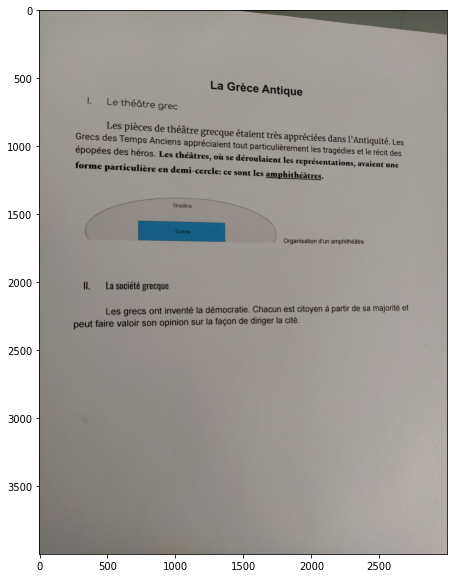

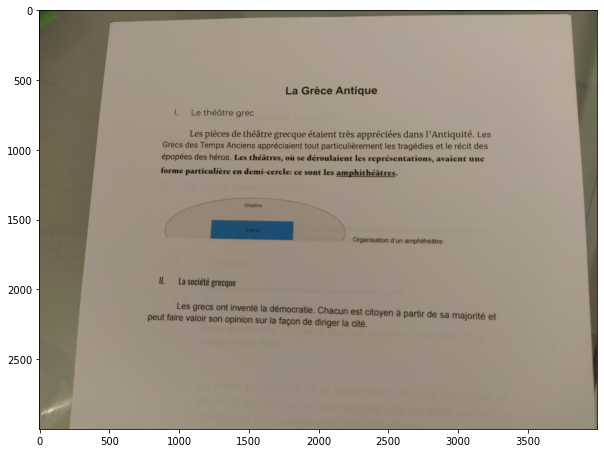

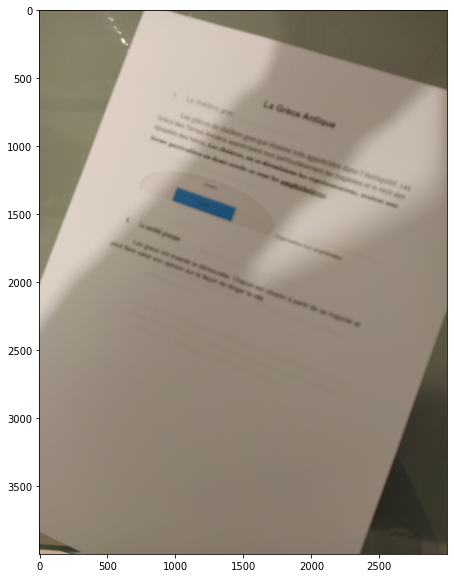

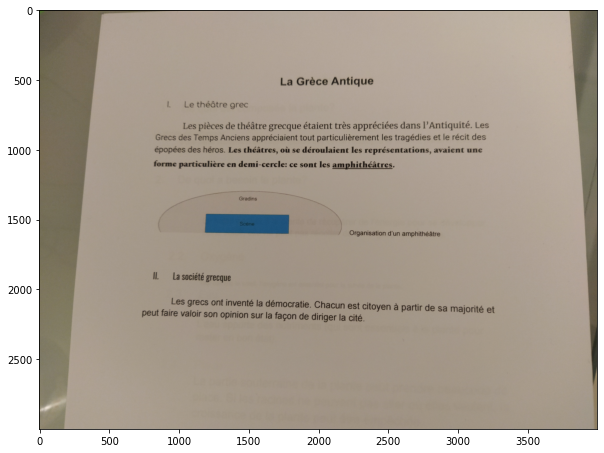

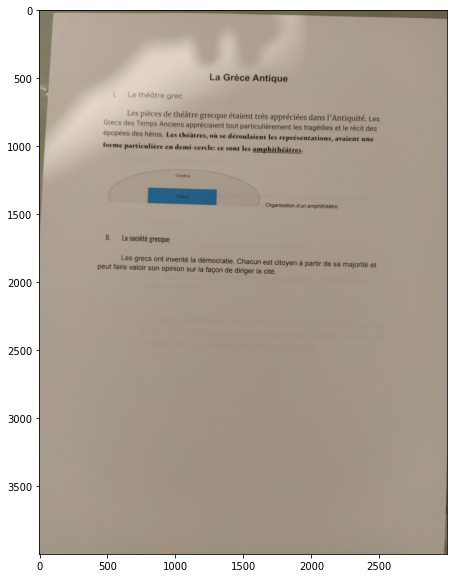

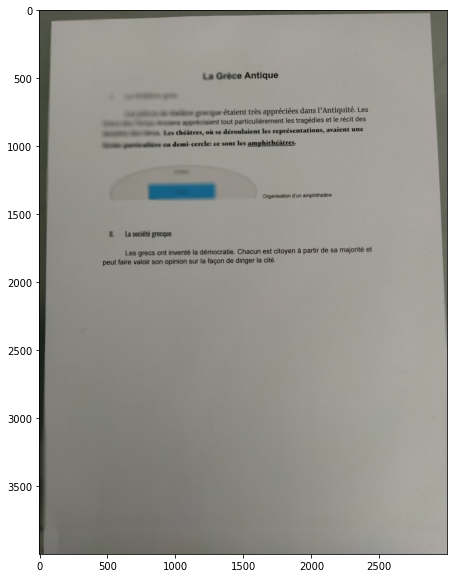

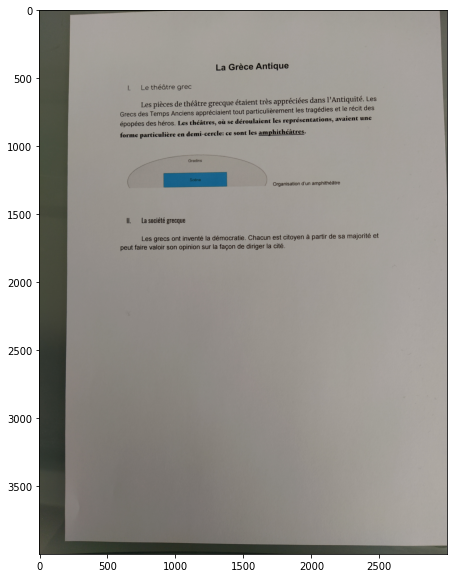

In [57]:
results = []

for img in images:
    plot_image(img)
    res = extract_text_from_image(img)
    
    results.append(res)

In [59]:
path = '../Exemples/truth/hist_geo.txt'

with open(path, 'r') as f:
    truth_hist_geo = f.read()
    
print(truth_hist_geo)

La Grèce Antique

I. Le théâtre grec

Les pièces de théâtre grecque étaient très appréciées dans l'Antiquité. Les
Grecs des Temps Anciens appréciaient tout particulièrement les tragédies et le récit des
épopées des héros. Les théâtres, où se déroulaients les représentations, avaient une
forme particulière en demi-cercle: ce sont les amphithéâtres.

Gradins

Scène
Organisation d'un amphithéâtre


II. La société grecque

Les grecs ont inventé la démocratie. Chacun est citoyen à partir de sa majorité et
peut faire valoir son opinion sur la façon de diriger la cité.


In [61]:
compare_df = list()

for res, file in zip(results, files):    
    tmp = dict(jiwer.compute_measures(truth=truth_hist_geo, hypothesis=res))
    tmp = pd.Series(tmp).to_frame().T
    
    tmp.index = [file]
    
    compare_df.append(tmp)
    
compare_df = pd.concat(compare_df)
compare_df

,wer,mer,wil,wip,hits,substitutions,deletions,insertions
../Exemples/Histoire_Geo/IMG_20210329_122543.jpg,0.536585,0.530120,0.596766,0.403234,39.0,6.0,37.0,1.0
../Exemples/Histoire_Geo/IMG_20210329_123005.jpg,0.402439,0.397590,0.491870,0.508130,50.0,9.0,23.0,1.0
../Exemples/Histoire_Geo/IMG_20210329_122940.jpg,1.000000,1.000000,1.000000,0.000000,0.0,0.0,82.0,0.0
../Exemples/Histoire_Geo/IMG_20210329_123000.jpg,0.304878,0.260417,0.352888,0.647112,71.0,10.0,1.0,14.0
../Exemples/Histoire_Geo/IMG_20210329_122932.jpg,0.158537,0.151163,0.235438,0.764562,73.0,8.0,1.0,4.0
../Exemples/Histoire_Geo/IMG_20210329_122524.jpg,0.365854,0.357143,0.538169,0.461831,54.0,21.0,7.0,2.0
../Exemples/Histoire_Geo/IMG_20210329_122536.jpg,0.390244,0.344086,0.478413,0.521587,61.0,15.0,6.0,11.0


In [63]:
fpath_hist_geo_score = '../Exemples/scores/score_hist_geo.pkl'

with open(fpath_hist_geo_score, 'wb') as f:
    pickle.dump(compare_df, f)